In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

df = pd.read_csv("Weekly.csv")

df

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


Q: Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

C:\Users\daner\AppData\Local\Temp\ipykernel_7128\2169672937.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  av = abs(df.iloc[:-9].corr())


            Year      Lag1      Lag2      Lag3      Lag4      Lag5    Volume  \
Year    1.000000  0.035918  0.036735  0.033761  0.035152  0.032459  0.839263   
Lag1    0.035918  1.000000  0.073946  0.058306  0.070586  0.009826  0.069320   
Lag2    0.036735  0.073946  1.000000  0.074860  0.058110  0.071330  0.089808   
Lag3    0.033761  0.058306  0.074860  1.000000  0.074724  0.060465  0.073480   
Lag4    0.035152  0.070586  0.058110  0.074724  1.000000  0.074347  0.063428   
Lag5    0.032459  0.009826  0.071330  0.060465  0.074347  1.000000  0.060955   
Volume  0.839263  0.069320  0.089808  0.073480  0.063428  0.060955  1.000000   
Today   0.036131  0.074128  0.058823  0.070567  0.009426  0.011390  0.035588   

           Today  
Year    0.036131  
Lag1    0.074128  
Lag2    0.058823  
Lag3    0.070567  
Lag4    0.009426  
Lag5    0.011390  
Volume  0.035588  
Today   1.000000  


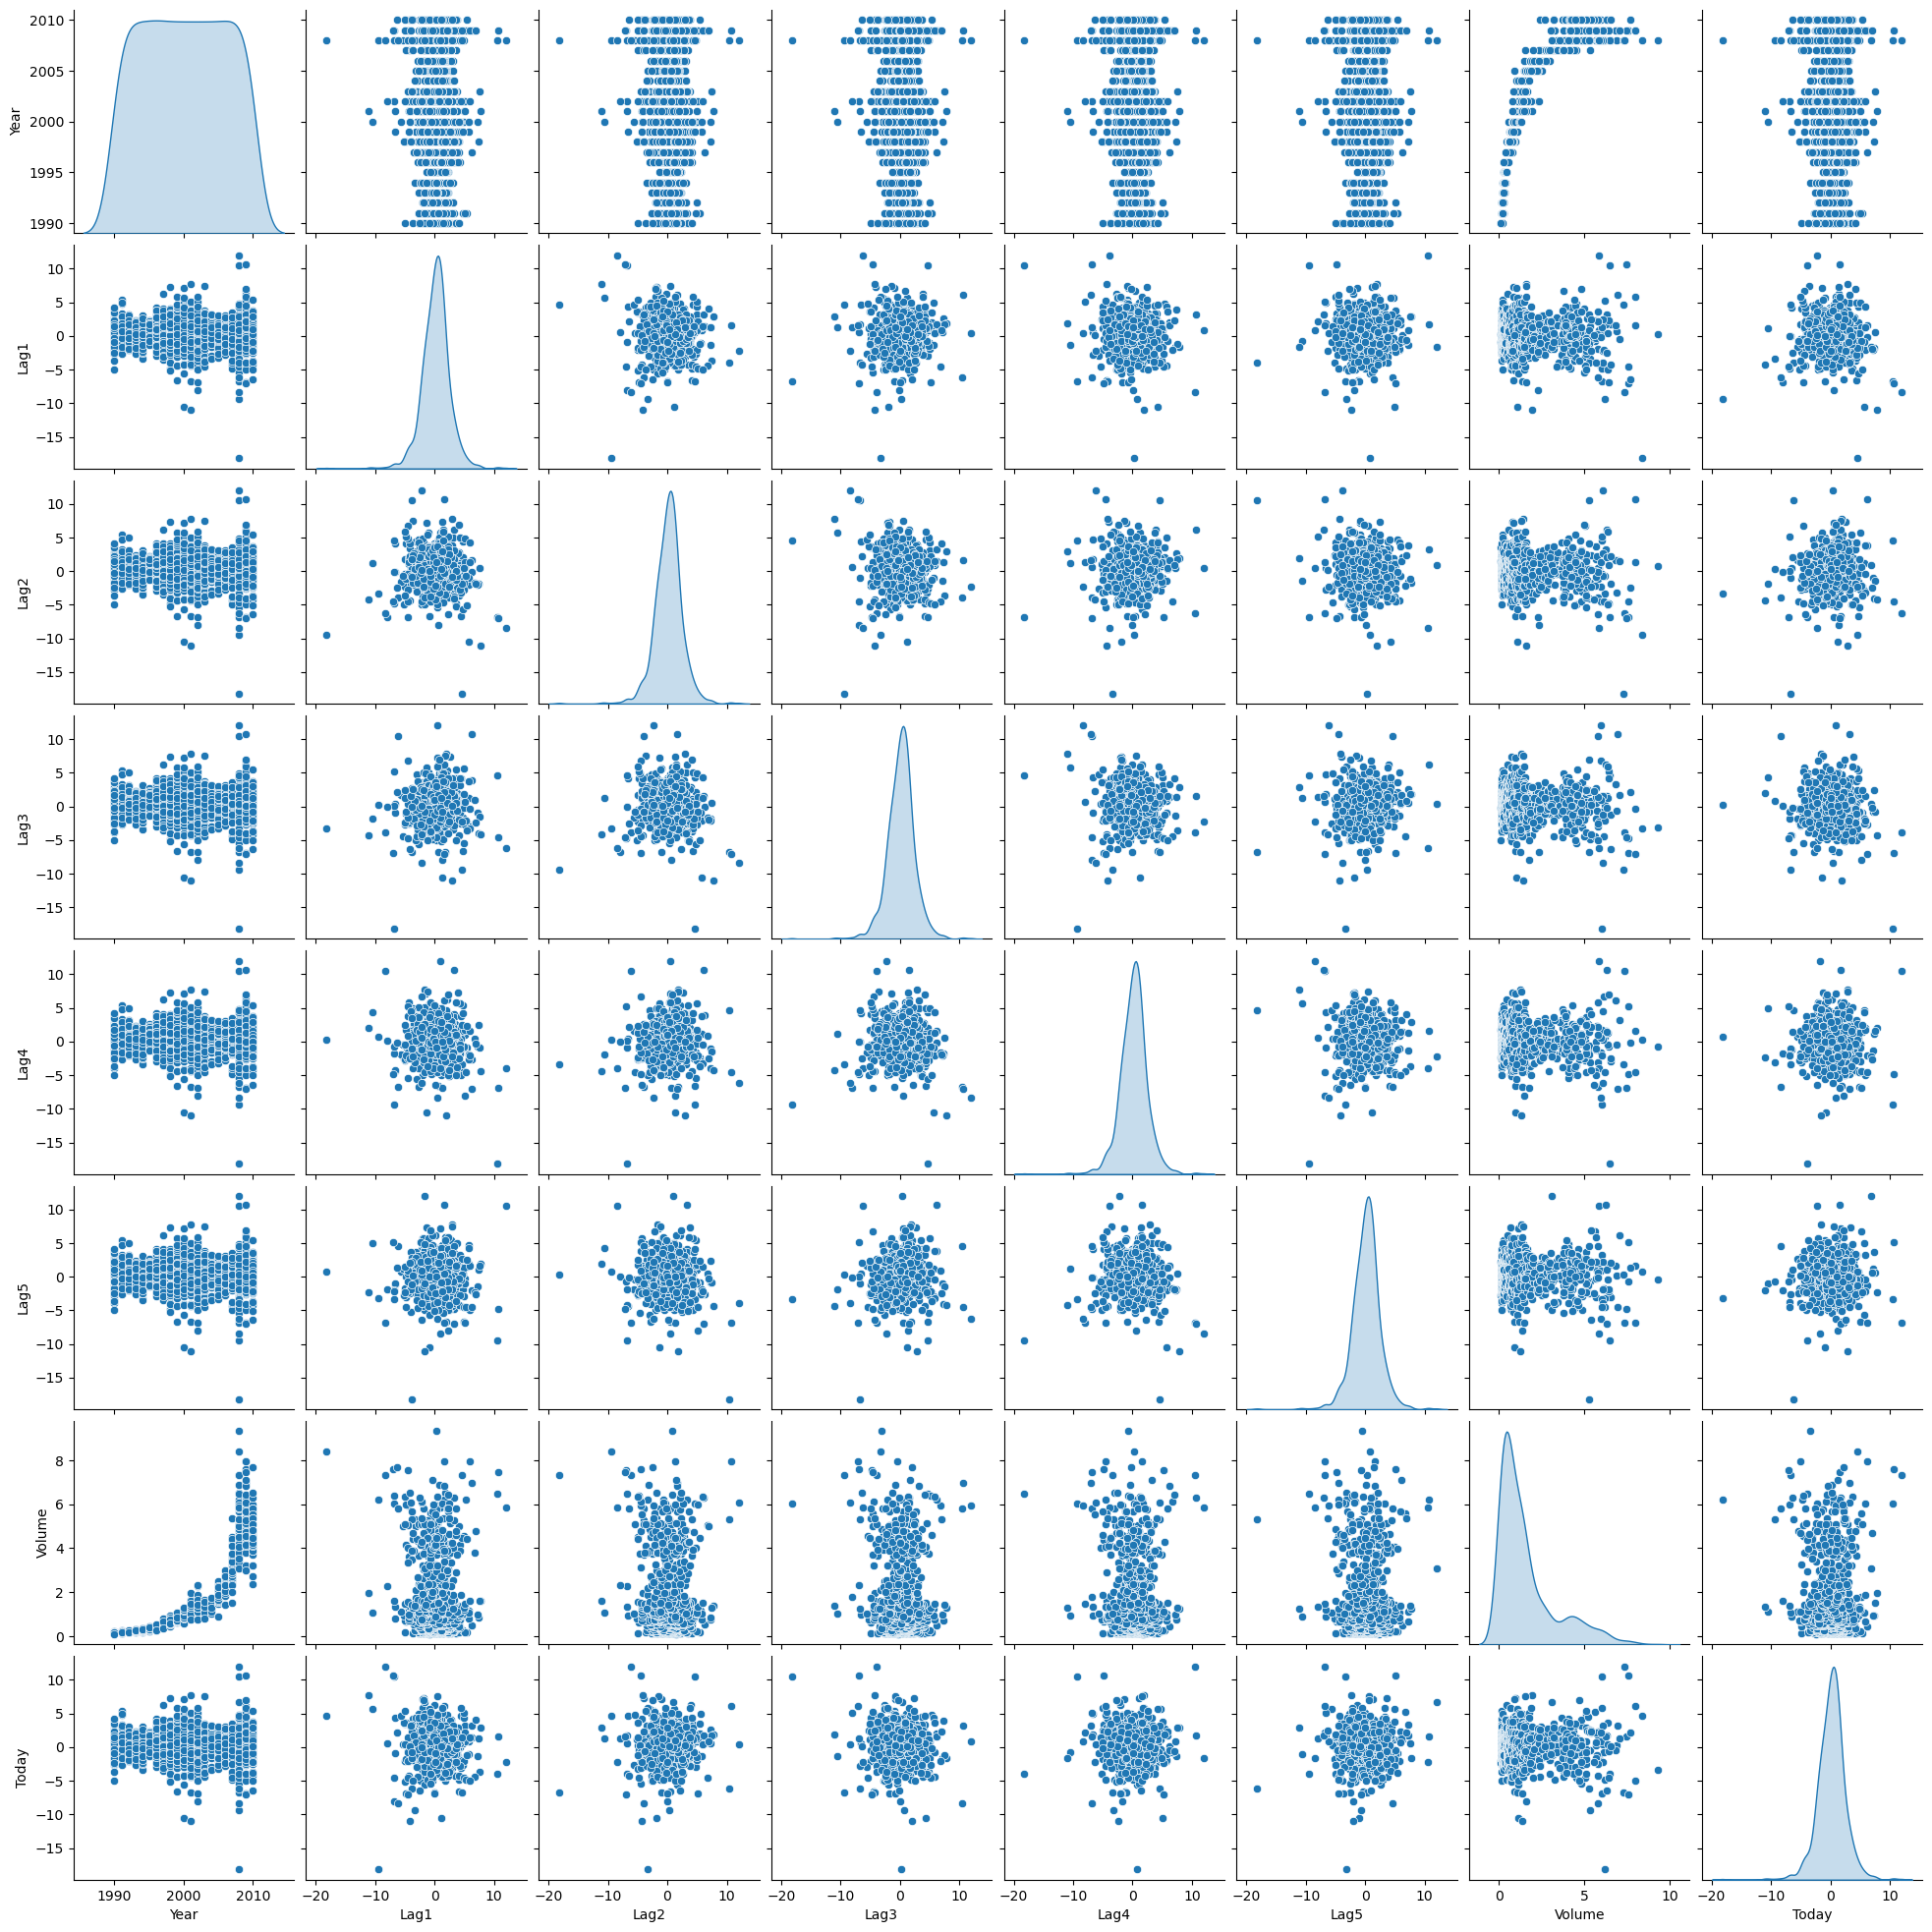

In [6]:
sns.pairplot(df, diag_kind = "kde")

av = abs(df.iloc[:-9].corr())

print(av)

#A: A relationship between other than year/volume is not appreciated

Q: Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [7]:
glmr = sm.formula.glm(formula="Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume", data=df, family=sm.families.Binomial()).fit()

print(glmr.summary())

                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1089
Model:                                              GLM   Df Residuals:                     1082
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    Logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -743.18
Date:                                  Wed, 16 Aug 2023   Deviance:                       1486.4
Time:                                          18:07:10   Pearson chi2:                 1.09e+03
No. Iterations:                                       4   Pseudo R-squ. (CS):           0.009000
Covariance Type:                              nonrobust                                         
                 coef    std e

A: Lag2 appears to be the only statistically significant predictor


Q: Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [31]:
#A:

df["Predicted"] = ["Down" if p < 0.5 else "Up" for p in glmr.predict(df[["Year","Lag1", "Lag2","Lag3","Lag4","Lag5","Volume"]])]

cm = confusion_matrix(df["Predicted"], df["Direction"], labels=["Up", "Down"])

accuracy = accuracy_score(df["Predicted"], df["Direction"])

print(cm)

[[ 48  54]
 [557 430]]


Q: Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [32]:
train_data = df[(df["Year"] >= 1990) & (df["Year"] <= 2008)]
test_data = df[(df["Year"] >= 2009) & (df["Year"] <= 2010)]

X_train = train_data[["Lag2"]]
y_train = train_data["Direction"]

X_test = test_data[["Lag2"]]
y_test = test_data["Direction"]

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

[[ 9 34]
 [ 5 56]]
0.625


Q: Repeat (d) using LDA.

In [36]:
#A:

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
print(cm,accuracy)


[[ 9 34]
 [ 5 56]] 0.625


Q: Repeat (d) using QDA.

In [37]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

y_pred = qda.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
print(cm,accuracy)

[[ 0 43]
 [ 0 61]] 0.5865384615384616


In [42]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

accuracy = accuracy_score(y_test, y_pred)
print(cm,accuracy)

[[22 21]
 [30 31]] 0.5096153846153846


Q: Which of these methods appears to provide the best results on this data?

A: Taking the target metric as the accuracy of the classifier: LDA & Logistic Regression get the same test accuracy of 0.625, so these two are tied.